## Lines of code per language

In [29]:
import os

def loc_jupyter(ipynb_files):
    from json import load
    from sys import argv

    def loc(nb):
        cells = load(open(nb))['cells']
        #print(cells)
        return sum(len(c['source']) for c in cells if c['cell_type'] == 'code')

    return sum(loc(nb) for nb in ipynb_files)

def loc_general(types_files):
    def loc(t):
        return len(open(t).readline())
    return sum(loc(nb) for nb in types_files)

In [11]:
files = list(os.walk('./staty'))
nof = []
for d,_,fs in files:
    nof.extend(list(map(lambda x: f'{d}/{x}', fs)))

In [74]:
types = ['.ipynb', '.kt','.cfg','.dart','dockerfile', '.py','.sh', '.md', '.properties']
names = [ 'Jupyter notebook', 'Kotlin','Configuration','Dart', 'Dockerfile', 'Python','Bash','Markdown', 'Properties']

N_types = len(types)
counts = []
locs = []
for ty in types:
    lty = len(ty)
    ty_f = list(filter(lambda x: lty < len(x) and x[-lty:] == ty, nof))
    counts.append(len(ty_f))
    if ty == '.ipynb':
        locs.append(loc_jupyter(ty_f))
    else:
        locs.append(loc_general(ty_f))
locs

[918, 34, 48, 221, 18, 429, 12, 146, 60]

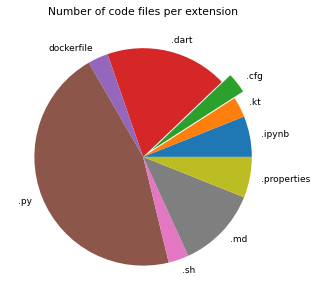

In [82]:
import matplotlib as mpl

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(5,5))
plt.pie(counts, labels=types, explode=[0,0,0.1,0,0,0,0,0,0])

plt.title('Number of code files per extension')
plt.show()

/home/jafar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


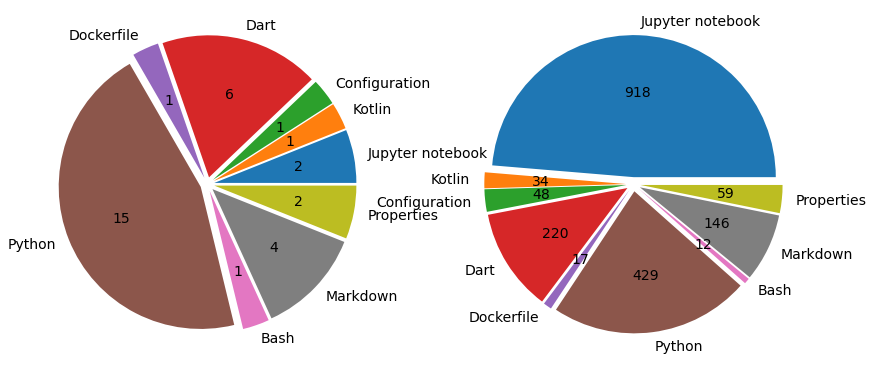

In [87]:
mpl.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (14, 7)
def absolute_value1(v):
    #print(v, sum(counts))
    return int(v * sum(counts)/100)
def absolute_value(v):
    #print(v, sum(counts))
    return int(v * sum(locs)/100)

fig, (ax1, ax2) = plt.subplots(ncols=2)
ax1.pie(counts, labels=names, explode=[0.05] * len(types), autopct=absolute_value1)
ax2.pie(locs, labels=names, explode=[0.05] * len(types), autopct=absolute_value)
fig.show()
# ax1.title('Number of code files per extension')
fig.savefig('./stats-code-files.png')
# plt.show()

<AxesSubplot:>